Bibliothèques importées avec succès
Fichiers CSV disponibles :
 - data\travel.csv
Fichier travel.csv chargé avec succès
Dimensions : (11, 8)
Aperçu des données :
Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         11 non-null     object 
 1   price         11 non-null     float64
 2   availability  11 non-null     object 
 3   rating        11 non-null     int64  
 4   description   11 non-null     object 
 5   image_url     11 non-null     object 
 6   category      11 non-null     object 
 7   product_url   11 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 836.0+ bytes
Statistiques descriptives :
Valeurs manquantes par colonne :
title           0
price           0
availability    0
rating          0
description     0
image_url       0
category        0
product_url     0
dty

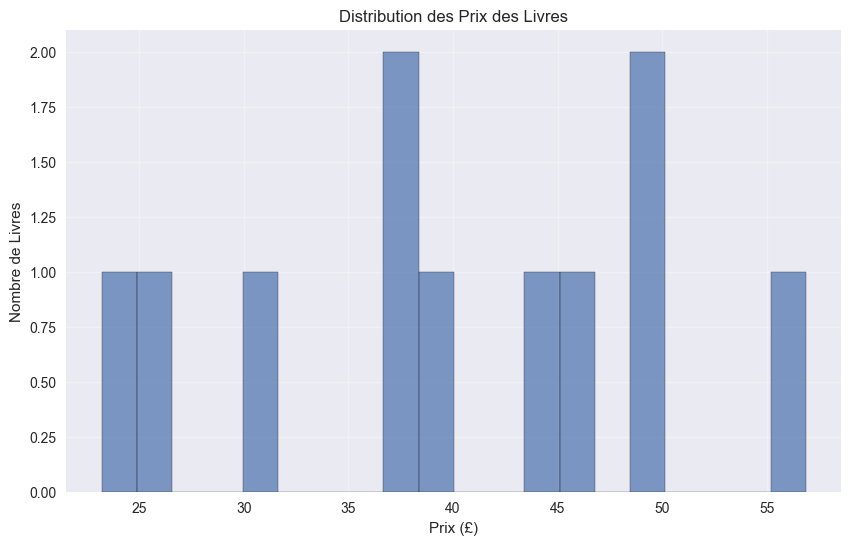

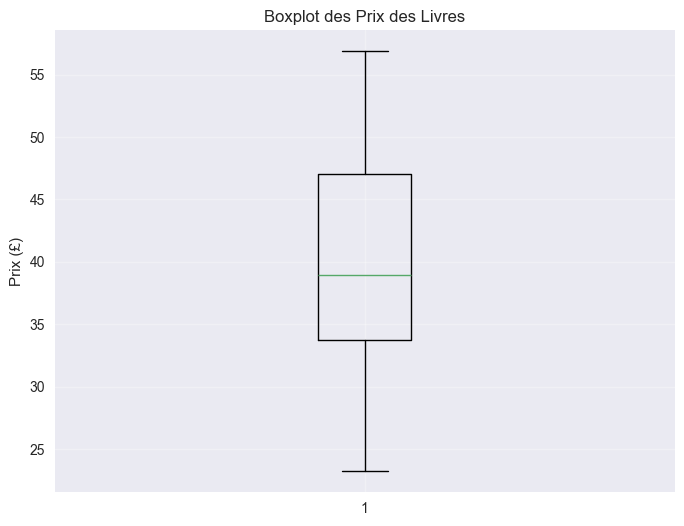

Analyse des évaluations :
Distribution des ratings :
rating
1    2
2    3
3    3
4    2
5    1
Name: count, dtype: int64


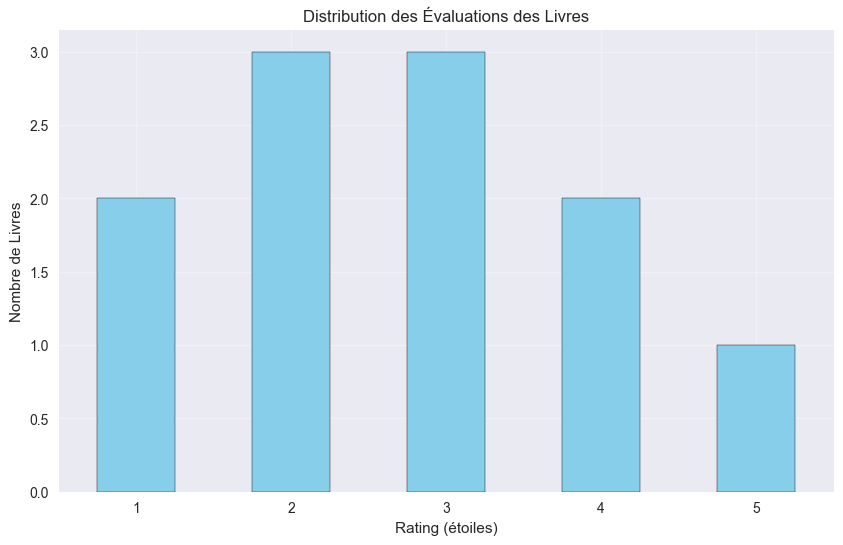

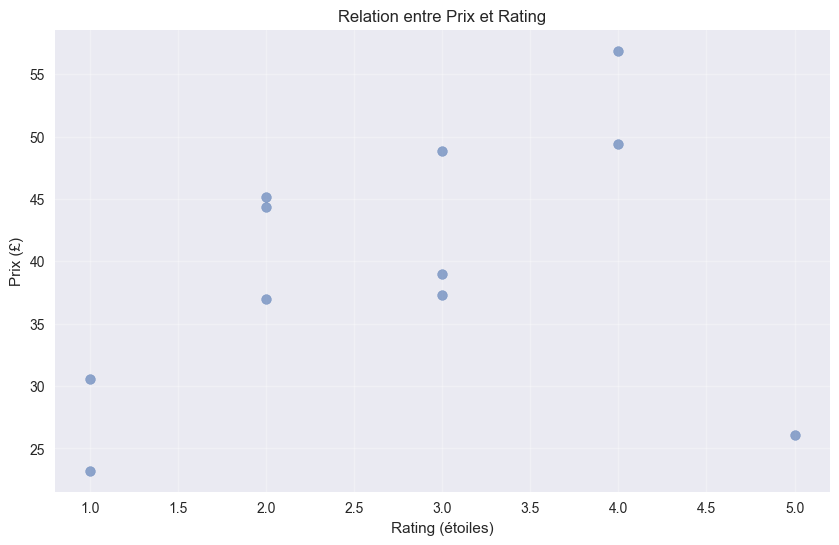

Analyse de la disponibilité :
availability
In stock (6 available)     2
In stock (3 available)     2
In stock (7 available)     2
In stock (19 available)    1
In stock (8 available)     1
In stock (14 available)    1
In stock (15 available)    1
In stock (1 available)     1
Name: count, dtype: int64


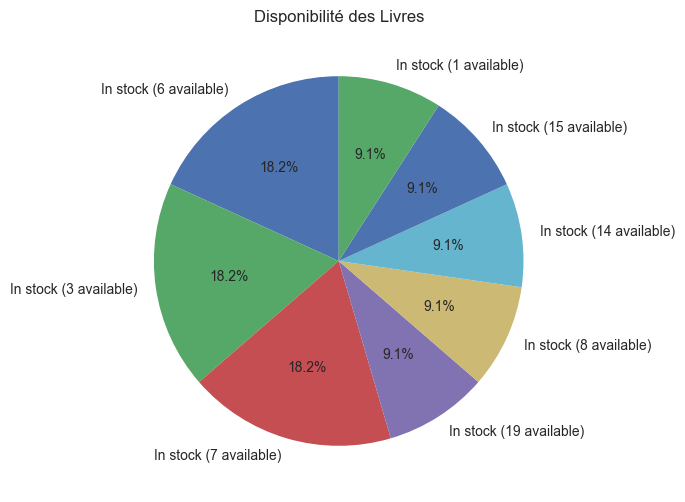

Quelques statistiques sur les titres :
Nombre total de livres : 11
Nombre de titres uniques : 11
Longueur moyenne des titres : 44.2 caractères
Mots les plus fréquents dans les titres :
  the: 5
  to: 4
  a: 4
  in: 4
  an: 3
  of: 3
  s: 2
  see: 2
  europe: 2
  provence: 2
✓ travel: 11 livres
Matrice de corrélation :
                 price    rating  title_length
price         1.000000  0.332044     -0.226912
rating        0.332044  1.000000     -0.163971
title_length -0.226912 -0.163971      1.000000


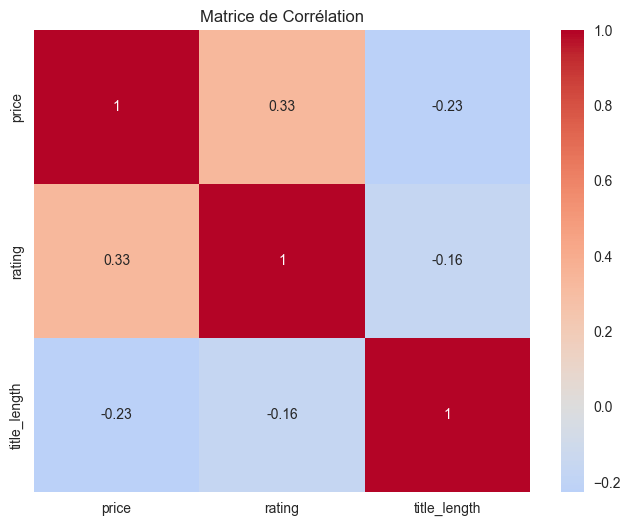

Résumé de l'analyse :
  Catégorie: Travel
  Total livres: 11
  Prix moyen: 39.79454545454545
  Prix médian: 38.95
  Rating moyen: 2.727272727272727
  Livres uniques: 11
Résumé sauvegardé dans : outputs/analysis_summary.csv
Quelques insights intéressants :

Top 5 des livres les plus chers :
                                               title  price  rating
7                   A Year in Provence (Provence #1)  56.88       4
1  Full Moon over Noah’s Ark: An Odyssey to Mount...  49.43       4
2  See America: A Celebration of Our National Par...  48.87       3
0                            It's Only the Himalayas  45.17       2
5                                 A Summer In Europe  44.34       2

Top 5 des livres les mieux notés :
                                                title  rating  price
10                 1,000 Places to See Before You Die       5  26.08
1   Full Moon over Noah’s Ark: An Odyssey to Mount...       4  49.43
7                    A Year in Provence (Provence #1)     

In [2]:
# analysis.ipynb

# %% [markdown]
# # Analyse des Données de Livres Scrapées
# 
# Ce notebook permet d'analyser les données extraites du site Books to Scrape.

# %%
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

# Configuration pour l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')

print("Bibliothèques importées avec succès")

# %% [markdown]
# ## 1. Chargement des données

# %%
# Chemin vers les données
data_path = "data/"
outputs_path = "outputs/"

# Vérification des fichiers disponibles
print("Fichiers CSV disponibles :")
csv_files = glob(os.path.join(data_path, "*.csv"))
for file in csv_files:
    print(f" - {file}")

# %%
# Chargement d'un fichier spécifique
try:
    # Essayer de charger un fichier de catégorie
    df_travel = pd.read_csv(os.path.join(data_path, "travel.csv"))
    print("Fichier travel.csv chargé avec succès")
    print(f"Dimensions : {df_travel.shape}")
except FileNotFoundError:
    # Essayer un autre fichier ou charger le premier disponible
    if csv_files:
        first_file = csv_files[0]
        df_travel = pd.read_csv(first_file)
        print(f"Fichier {os.path.basename(first_file)} chargé avec succès")
        print(f"Dimensions : {df_travel.shape}")
    else:
        print("Aucun fichier CSV trouvé. Veuillez d'abord scraper des données.")

# %% [markdown]
# ## 2. Exploration basique des données

# %%
# Aperçu des premières lignes
print("Aperçu des données :")
df_travel.head()

# %%
# Informations sur le DataFrame
print("Informations sur les données :")
df_travel.info()

# %%
# Statistiques descriptives
print("Statistiques descriptives :")
df_travel.describe(include='all')

# %%
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
missing_data = df_travel.isnull().sum()
print(missing_data)

# %% [markdown]
# ## 3. Analyse des prix

# %%
# Analyse de la colonne prix
print("Analyse des prix :")

# Vérifier le type de données
print(f"Type de la colonne prix : {df_travel['price'].dtype}")

# Statistiques des prix
print(f"Prix moyen : £{df_travel['price'].mean():.2f}")
print(f"Prix médian : £{df_travel['price'].median():.2f}")
print(f"Prix minimum : £{df_travel['price'].min():.2f}")
print(f"Prix maximum : £{df_travel['price'].max():.2f}")

# %%
# Histogramme des prix
plt.figure(figsize=(10, 6))
plt.hist(df_travel['price'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution des Prix des Livres')
plt.xlabel('Prix (£)')
plt.ylabel('Nombre de Livres')
plt.grid(True, alpha=0.3)
plt.show()

# %%
# Boxplot des prix
plt.figure(figsize=(8, 6))
plt.boxplot(df_travel['price'])
plt.title('Boxplot des Prix des Livres')
plt.ylabel('Prix (£)')
plt.grid(True, alpha=0.3)
plt.show()

# %% [markdown]
# ## 4. Analyse des ratings

# %%
# Analyse des évaluations
print("Analyse des évaluations :")

# Distribution des ratings
rating_counts = df_travel['rating'].value_counts().sort_index()
print("Distribution des ratings :")
print(rating_counts)

# %%
# Diagramme en barres des ratings
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution des Évaluations des Livres')
plt.xlabel('Rating (étoiles)')
plt.ylabel('Nombre de Livres')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

# %%
# Relation entre prix et rating
plt.figure(figsize=(10, 6))
plt.scatter(df_travel['rating'], df_travel['price'], alpha=0.6, s=50)
plt.title('Relation entre Prix et Rating')
plt.xlabel('Rating (étoiles)')
plt.ylabel('Prix (£)')
plt.grid(True, alpha=0.3)
plt.show()

# %% [markdown]
# ## 5. Analyse de la disponibilité

# %%
# Analyse de la disponibilité
if 'availability' in df_travel.columns:
    print("Analyse de la disponibilité :")
    availability_counts = df_travel['availability'].value_counts()
    print(availability_counts)
    
    # Diagramme de la disponibilité
    plt.figure(figsize=(8, 6))
    availability_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Disponibilité des Livres')
    plt.ylabel('')
    plt.show()

# %% [markdown]
# ## 6. Analyse des titres et descriptions

# %%
# Analyse des titres
print("Quelques statistiques sur les titres :")
print(f"Nombre total de livres : {len(df_travel)}")
print(f"Nombre de titres uniques : {df_travel['title'].nunique()}")

# Longueur des titres
df_travel['title_length'] = df_travel['title'].str.len()
print(f"Longueur moyenne des titres : {df_travel['title_length'].mean():.1f} caractères")

# %%
# Mots les plus fréquents dans les titres (simplifié)
from collections import Counter
import re

# Extraction des mots des titres
all_titles = ' '.join(df_travel['title'].dropna().astype(str))
words = re.findall(r'\b\w+\b', all_titles.lower())
common_words = Counter(words).most_common(10)

print("Mots les plus fréquents dans les titres :")
for word, count in common_words:
    print(f"  {word}: {count}")

# %% [markdown]
# ## 7. Chargement de plusieurs catégories

# %%
# Chargement de tous les fichiers CSV disponibles
all_dataframes = {}

for csv_file in csv_files:
    category_name = os.path.basename(csv_file).replace('.csv', '')
    try:
        df = pd.read_csv(csv_file)
        all_dataframes[category_name] = df
        print(f"✓ {category_name}: {len(df)} livres")
    except Exception as e:
        print(f"✗ Erreur avec {category_name}: {e}")

# %%
# Analyse comparative si plusieurs catégories sont disponibles
if len(all_dataframes) > 1:
    print("\nComparaison entre catégories :")
    
    comparison_data = []
    for category, df in all_dataframes.items():
        comparison_data.append({
            'Catégorie': category,
            'Nombre de livres': len(df),
            'Prix moyen': df['price'].mean(),
            'Rating moyen': df['rating'].mean()
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df)
    
    # Graphique comparatif
    if len(comparison_df) > 1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Prix moyens par catégorie
        ax1.bar(comparison_df['Catégorie'], comparison_df['Prix moyen'], color='lightcoral')
        ax1.set_title('Prix Moyen par Catégorie')
        ax1.set_ylabel('Prix Moyen (£)')
        ax1.tick_params(axis='x', rotation=45)
        
        # Nombre de livres par catégorie
        ax2.bar(comparison_df['Catégorie'], comparison_df['Nombre de livres'], color='lightgreen')
        ax2.set_title('Nombre de Livres par Catégorie')
        ax2.set_ylabel('Nombre de Livres')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

# %% [markdown]
# ## 8. Recherche de corrélations

# %%
# Matrice de corrélation (pour les colonnes numériques)
numeric_columns = df_travel.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 1:
    print("Matrice de corrélation :")
    correlation_matrix = df_travel[numeric_columns].corr()
    print(correlation_matrix)
    
    # Heatmap de corrélation
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matrice de Corrélation')
    plt.show()

# %% [markdown]
# ## 9. Export des résultats d'analyse

# %%
# Création d'un résumé des analyses
analysis_summary = {
    'Catégorie': 'Travel',
    'Total livres': len(df_travel),
    'Prix moyen': df_travel['price'].mean(),
    'Prix médian': df_travel['price'].median(),
    'Rating moyen': df_travel['rating'].mean(),
    'Livres uniques': df_travel['title'].nunique()
}

print("Résumé de l'analyse :")
for key, value in analysis_summary.items():
    print(f"  {key}: {value}")

# %%
# Sauvegarde du résumé (optionnel)
summary_df = pd.DataFrame([analysis_summary])
summary_path = os.path.join(outputs_path, "analysis_summary.csv")
summary_df.to_csv(summary_path, index=False)
print(f"Résumé sauvegardé dans : {summary_path}")

# %% [markdown]
# ## 10. Questions d'analyse supplémentaires

# %%
# Exemples de questions analytiques

print("Quelques insights intéressants :")

# Livres les plus chers
print("\nTop 5 des livres les plus chers :")
expensive_books = df_travel.nlargest(5, 'price')[['title', 'price', 'rating']]
print(expensive_books)

# Meilleurs livres (rating élevé)
print("\nTop 5 des livres les mieux notés :")
top_rated = df_travel.nlargest(5, 'rating')[['title', 'rating', 'price']]
print(top_rated)

# Meilleur rapport qualité-prix
print("\nTop 5 meilleur rapport qualité-prix (rating/prix) :")
df_travel['value_ratio'] = df_travel['rating'] / df_travel['price']
best_value = df_travel.nlargest(5, 'value_ratio')[['title', 'rating', 'price', 'value_ratio']]
print(best_value)

# %%
print("Analyse terminée !")